## Assignment 4

#### STUDENT: Francis Emmanuel Calingo

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [1]:
#your work here

In [61]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [3]:
Set1 = pd.read_csv('Set1.csv')
Set2 = pd.read_csv('Set2.csv')
Set3 = pd.read_csv('Set3.csv')
Set4 = pd.read_csv('Set4.csv')
Set5 = pd.read_csv('Set5.csv')
Set6 = pd.read_csv('Set6.csv')

In [4]:
df1 = pd.DataFrame(Set1)
df1

,Y Values,X Values
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903
...,...,...
95,21.347437,4.304918
96,15.811618,4.106201
97,39.739810,7.612336
98,7.963448,1.227335


array([[<Axes: xlabel='Y Values', ylabel='Y Values'>,
        <Axes: xlabel='X Values', ylabel='Y Values'>],
       [<Axes: xlabel='Y Values', ylabel='X Values'>,
        <Axes: xlabel='X Values', ylabel='X Values'>]], dtype=object)

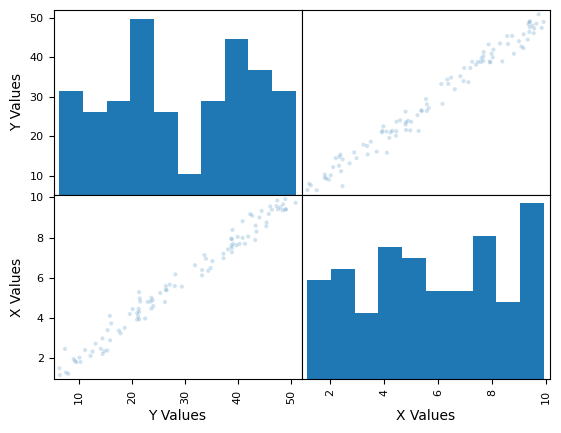

In [5]:
fig1=pd.plotting.scatter_matrix(df1, alpha=0.2)
fig1

array([[<Axes: xlabel='Y Values', ylabel='Y Values'>,
        <Axes: xlabel='X Values', ylabel='Y Values'>],
       [<Axes: xlabel='Y Values', ylabel='X Values'>,
        <Axes: xlabel='X Values', ylabel='X Values'>]], dtype=object)

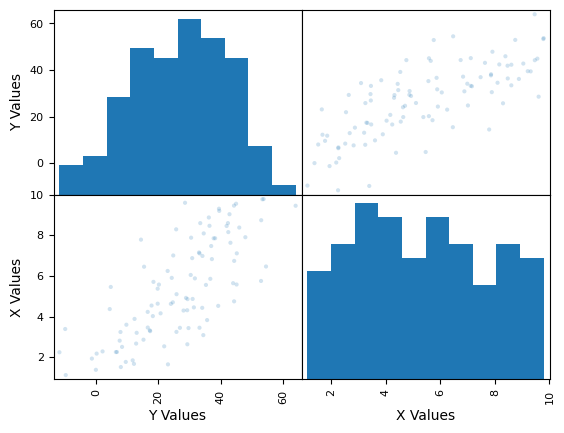

In [6]:
df2 = pd.DataFrame(Set2)
fig2=pd.plotting.scatter_matrix(df2, alpha=0.2)
fig2

array([[<Axes: xlabel='Y Values', ylabel='Y Values'>,
        <Axes: xlabel='X Values', ylabel='Y Values'>],
       [<Axes: xlabel='Y Values', ylabel='X Values'>,
        <Axes: xlabel='X Values', ylabel='X Values'>]], dtype=object)

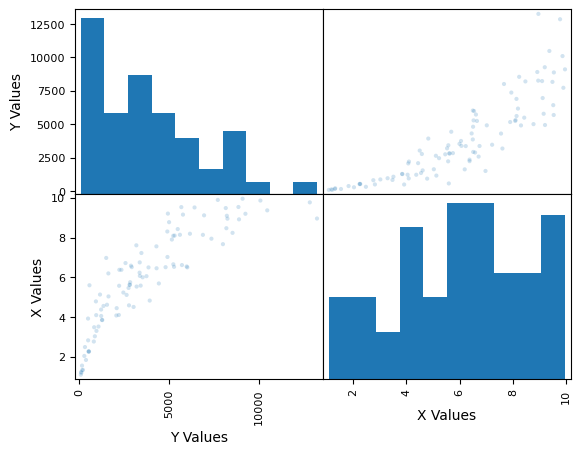

In [54]:
df3 = pd.DataFrame(Set3)
fig3=pd.plotting.scatter_matrix(df3, alpha=0.2)
fig3

array([[<Axes: xlabel='Y Values', ylabel='Y Values'>,
        <Axes: xlabel='X Values', ylabel='Y Values'>],
       [<Axes: xlabel='Y Values', ylabel='X Values'>,
        <Axes: xlabel='X Values', ylabel='X Values'>]], dtype=object)

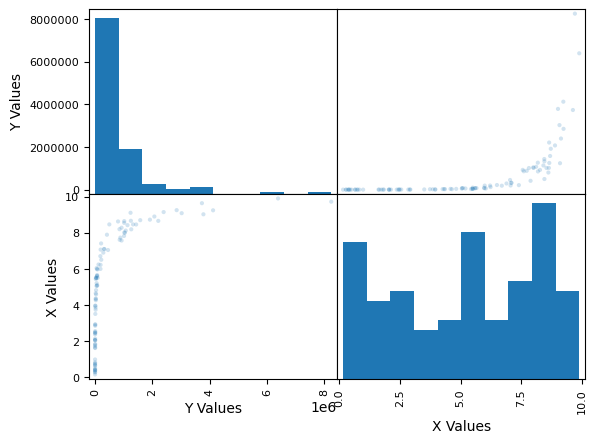

In [55]:
df4 = pd.DataFrame(Set4)
fig4=pd.plotting.scatter_matrix(df4, alpha=0.2)
fig4

array([[<Axes: xlabel='Y Values', ylabel='Y Values'>,
        <Axes: xlabel='X Values', ylabel='Y Values'>],
       [<Axes: xlabel='Y Values', ylabel='X Values'>,
        <Axes: xlabel='X Values', ylabel='X Values'>]], dtype=object)

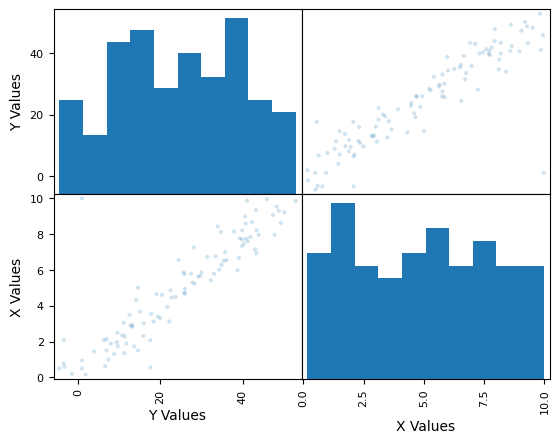

In [9]:
df5 = pd.DataFrame(Set5)
fig5=pd.plotting.scatter_matrix(df5, alpha=0.2)
fig5

array([[<Axes: xlabel='Y Values', ylabel='Y Values'>,
        <Axes: xlabel='X Values', ylabel='Y Values'>],
       [<Axes: xlabel='Y Values', ylabel='X Values'>,
        <Axes: xlabel='X Values', ylabel='X Values'>]], dtype=object)

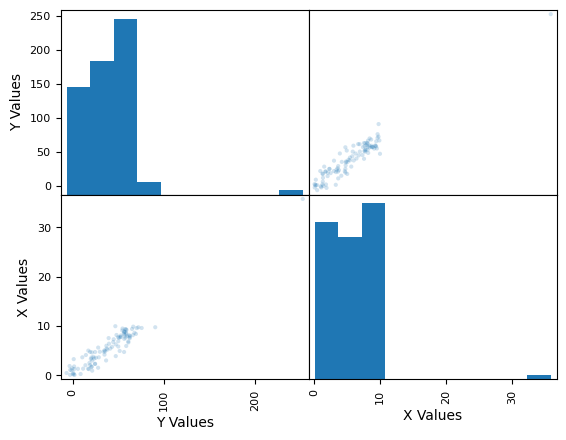

In [10]:
df6 = pd.DataFrame(Set6)
fig6=pd.plotting.scatter_matrix(df6, alpha=0.2)
fig6

In [44]:
#Sets 1, 2, 5, and 6 appear to have a linear relation.
#Therefore, the third and fourth dataframes need to be transformed.

array([[<Axes: xlabel='Y Values', ylabel='Y Values'>,
        <Axes: xlabel='X Values', ylabel='Y Values'>],
       [<Axes: xlabel='Y Values', ylabel='X Values'>,
        <Axes: xlabel='X Values', ylabel='X Values'>]], dtype=object)

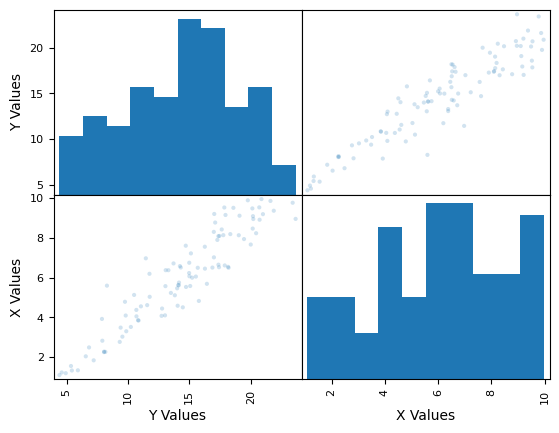

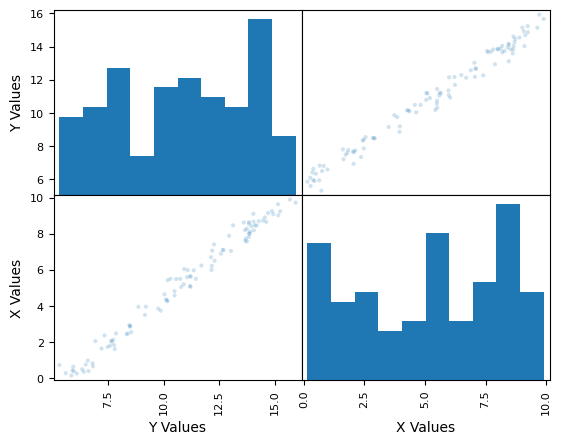

In [56]:
#Transformed Dataset 3
df3["Y Values"]= np.cbrt(df3["Y Values"])
fig3T=pd.plotting.scatter_matrix(df3, alpha=0.2, label='Log-Transformed Data, Set 3')
fig3T

#Transformed Dataset 4
df4["Y Values"]= np.log(df4["Y Values"])
fig4T=pd.plotting.scatter_matrix(df4, alpha=0.2, label='Log-Transformed Data, Set 4')
fig4T

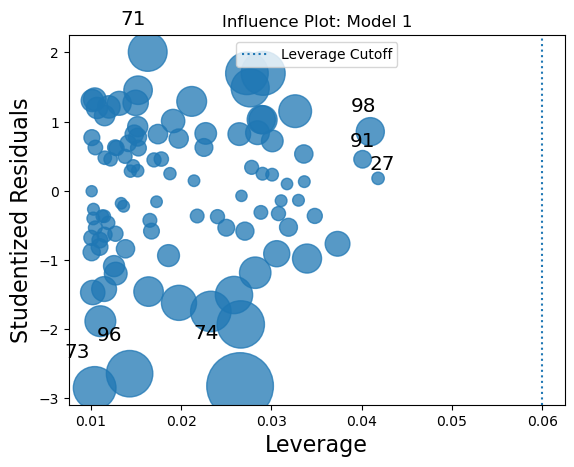

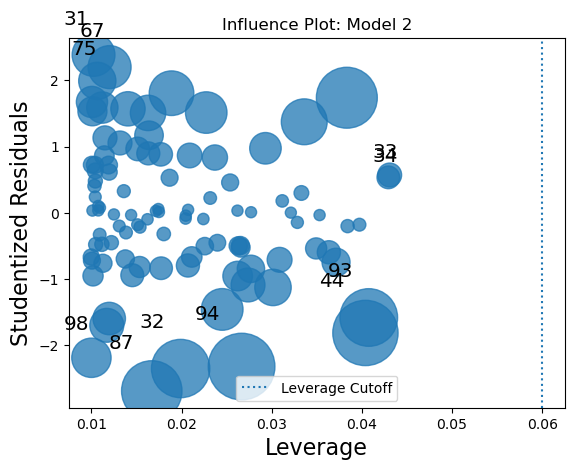

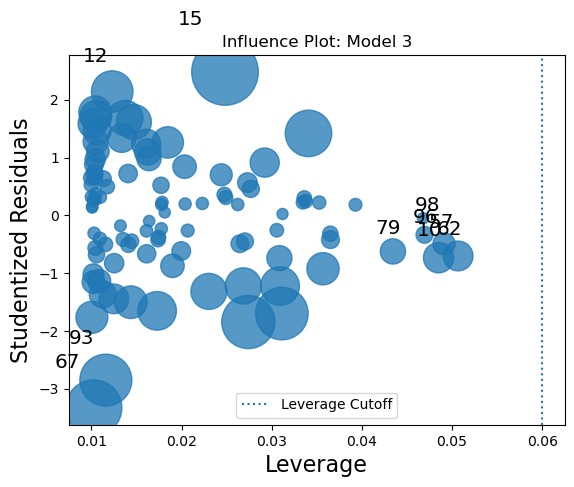

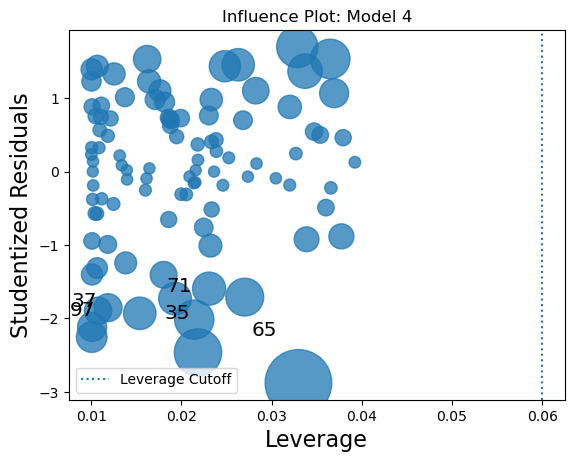

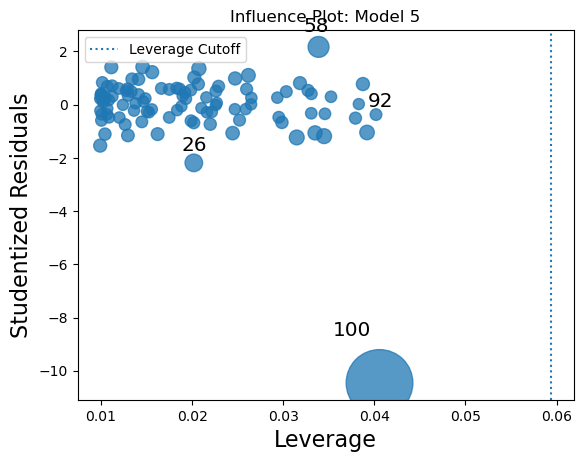

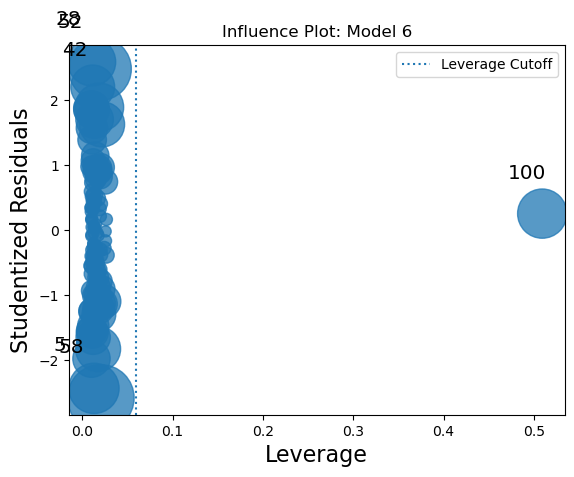

In [57]:
#Now each dataset will be inspected for outliers and high leverages.

#Dataset 1
model1 = sm.OLS(df1["Y Values"], sm.add_constant(df1["X Values"])).fit()

influence_plot(model1)
n=df1.shape[0]
p=df1.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 1')
plt.show()

#Dataset 2
model2 = sm.OLS(df2["Y Values"], sm.add_constant(df2["X Values"])).fit()

influence_plot(model2)
n=df2.shape[0]
p=df2.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 2')
plt.show()

#Dataset 3
model3 = sm.OLS(df3["Y Values"], sm.add_constant(df3["X Values"])).fit()

influence_plot(model3)
n=df3.shape[0]
p=df3.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 3')
plt.show()

#Dataset 4
model4 = sm.OLS(df4["Y Values"], sm.add_constant(df4["X Values"])).fit()

influence_plot(model4)
n=df4.shape[0]
p=df4.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 4')
plt.show()

#Dataset 5
model5 = sm.OLS(df5["Y Values"], sm.add_constant(df5["X Values"])).fit()

influence_plot(model5)
n=df5.shape[0]
p=df5.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 5')
plt.show()

#Dataset 6
model6 = sm.OLS(df6["Y Values"], sm.add_constant(df6["X Values"])).fit()

influence_plot(model6)
n=df6.shape[0]
p=df6.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 6')
plt.show()

In [58]:
#Observations:

#In the 3rd plot, point 67 has a studentized residual below -3.

#In the 5th plot, point 100 has a studentized residual below -3.

#In the 6th plot, point 100 exceeds the leverage cutoff.

In [60]:
print(model3.summary())
print(model5.summary())
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:               Y Values   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     661.1
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           2.35e-45
Time:                        22:40:50   Log-Likelihood:                -193.39
No. Observations:                 100   AIC:                             390.8
Df Residuals:                      98   BIC:                             396.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6142      0.450      8.031      0.0

In [68]:
update_df3 = df3.drop(67)

update_df5 = df5.drop(100)

update_df6 = df6.drop(100)

update_df3

,Y Values,X Values
0,18.594275,9.517
1,13.820848,5.113
2,23.427785,9.773
3,17.642590,8.428
4,14.159436,5.752
...,...,...
95,17.371968,8.091
96,5.425058,1.325
97,12.779454,4.446
98,5.914206,1.335


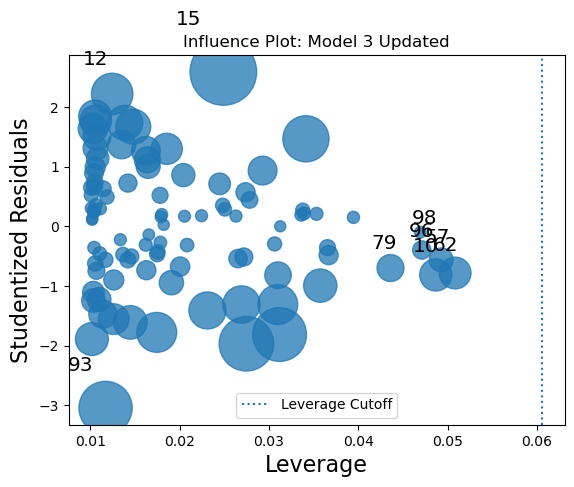

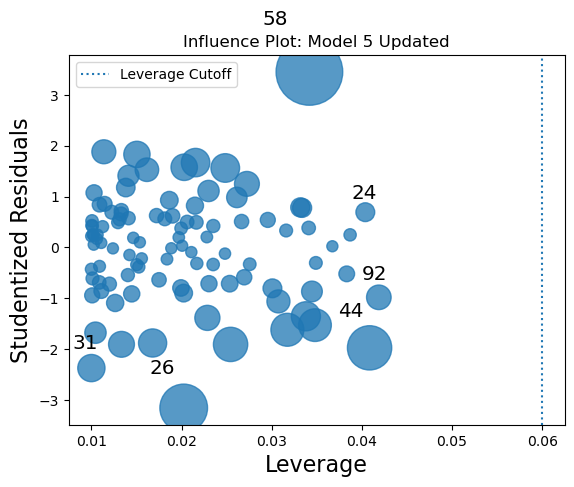

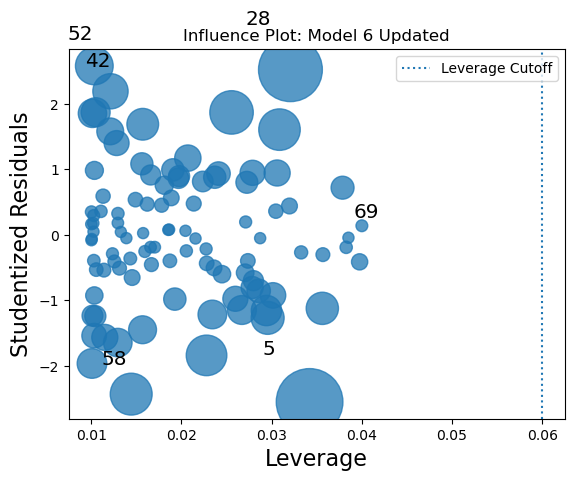

In [69]:
#Updated Dataset 3
update_model3 = sm.OLS(update_df3["Y Values"], sm.add_constant(update_df3["X Values"])).fit()

influence_plot(update_model3)
n=update_df3.shape[0]
p=update_df3.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 3 Updated')
plt.show()

#Updated Dataset 5
update_model5 = sm.OLS(update_df5["Y Values"], sm.add_constant(update_df5["X Values"])).fit()

influence_plot(update_model5)
n=update_df5.shape[0]
p=update_df5.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 5 Updated')
plt.show()

#Updated Dataset 6
update_model6 = sm.OLS(update_df6["Y Values"], sm.add_constant(update_df6["X Values"])).fit()

influence_plot(update_model6)
n=update_df6.shape[0]
p=update_df6.shape[1]
leverage_cutoff =3*(p/n)
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.title('Influence Plot: Model 6 Updated')
plt.show()

In [70]:
print(update_model3.summary())
print(update_model5.summary())
print(update_model6.summary())

                            OLS Regression Results                            
Dep. Variable:               Y Values   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     726.0
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           7.85e-47
Time:                        22:53:52   Log-Likelihood:                -186.59
No. Observations:                  99   AIC:                             377.2
Df Residuals:                      97   BIC:                             382.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6901      0.429      8.600      0.0

In [81]:
#Now, the OLS assumptions will be evaluated for each model. Of course, the first assumption that each model is linear passes.

In [84]:
#Homoscedasticity (each model passes, as, in each case, variances are equal or near equal for each point).

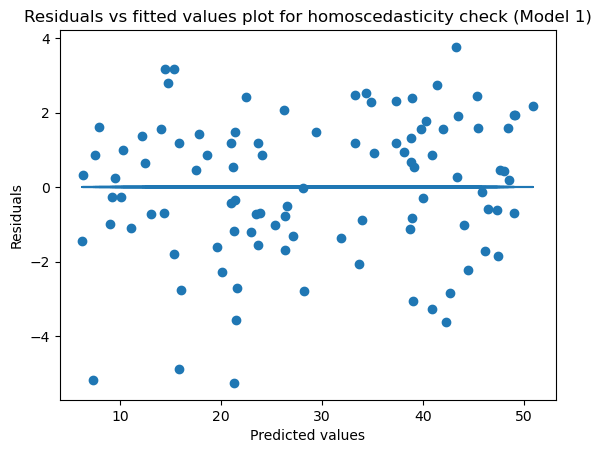

In [74]:
residuals1=model1.resid
Y1=df1["Y Values"]
plt.scatter(Y1, residuals1)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for homoscedasticity check (Model 1)')
plt.plot(Y1, [0]*len(Y1))

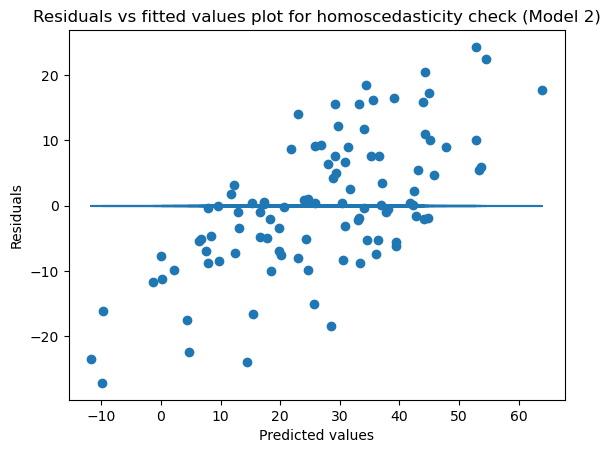

In [75]:
residuals2=model2.resid
Y2=df2["Y Values"]
plt.scatter(Y2, residuals2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for homoscedasticity check (Model 2)')
plt.plot(Y2, [0]*len(Y2))

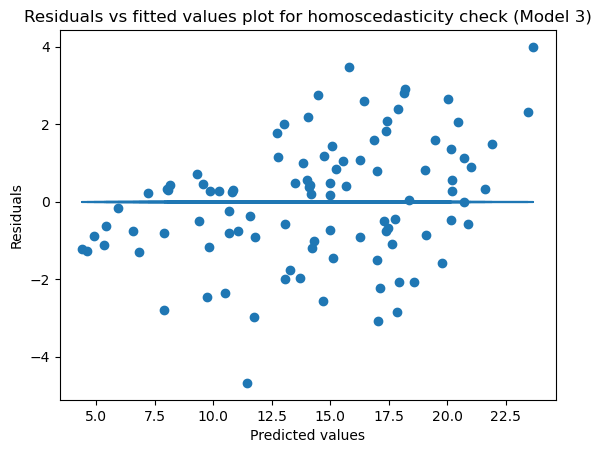

In [76]:
residuals3=update_model3.resid
Y3=update_df3["Y Values"]
plt.scatter(Y3, residuals3)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for homoscedasticity check (Model 3)')
plt.plot(Y3, [0]*len(Y3))

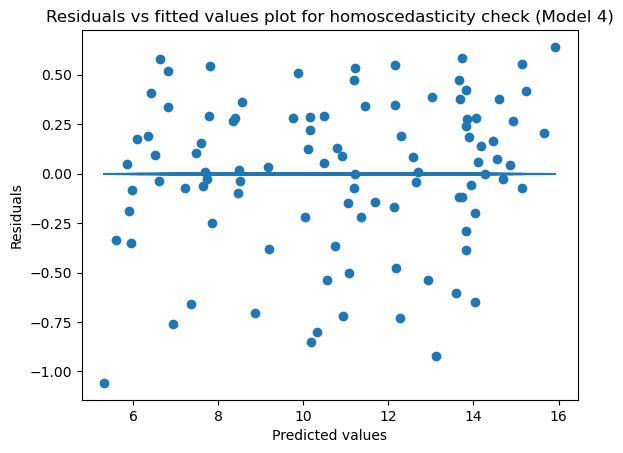

In [77]:
residuals4=model4.resid
Y4=df4["Y Values"]
plt.scatter(Y4, residuals4)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for homoscedasticity check (Model 4)')
plt.plot(Y4, [0]*len(Y4))

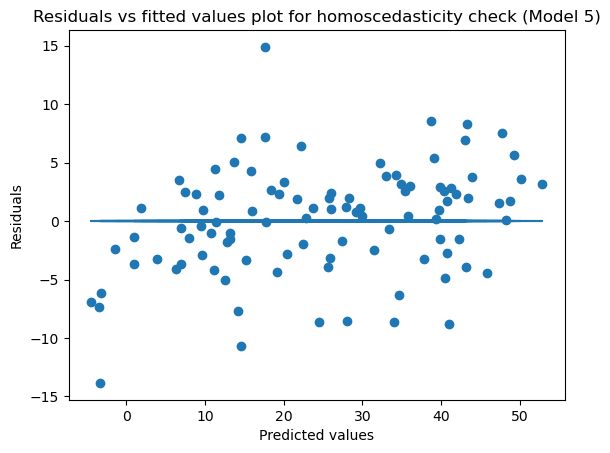

In [78]:
residuals5=update_model5.resid
Y5=update_df5["Y Values"]
plt.scatter(Y5, residuals5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for homoscedasticity check (Model 5)')
plt.plot(Y5, [0]*len(Y5))

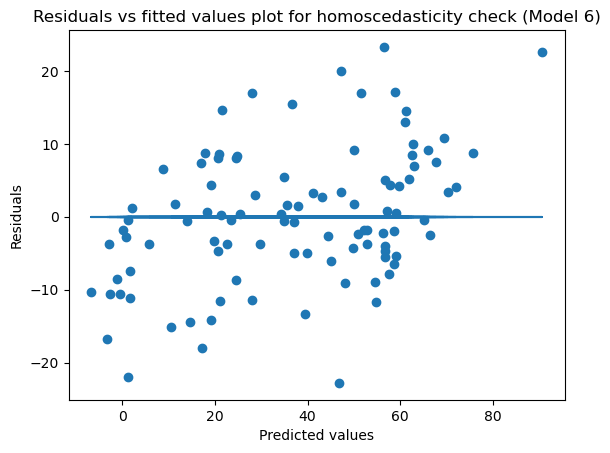

In [79]:
residuals6=update_model6.resid
Y6=update_df6["Y Values"]
plt.scatter(Y6, residuals6)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for homoscedasticity check (Model 6)')
plt.plot(Y6, [0]*len(Y6))

In [90]:
#Autocorrelation (no autocorrelation detected)

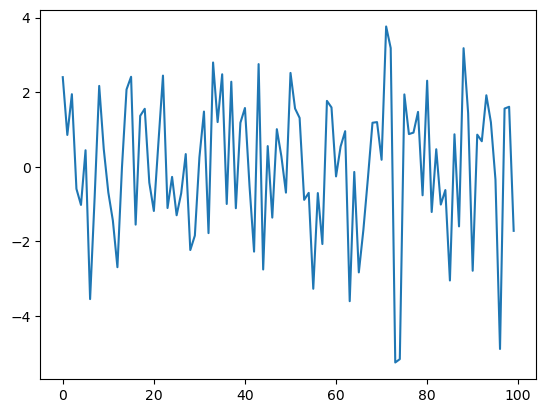

In [83]:
plt.plot(residuals1.index, residuals1)

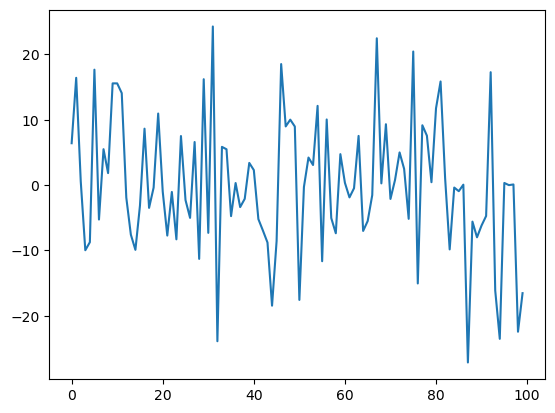

In [85]:
plt.plot(residuals2.index, residuals2)

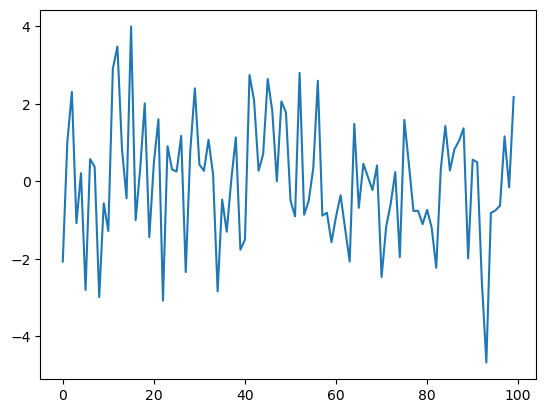

In [86]:
plt.plot(residuals3.index, residuals3)

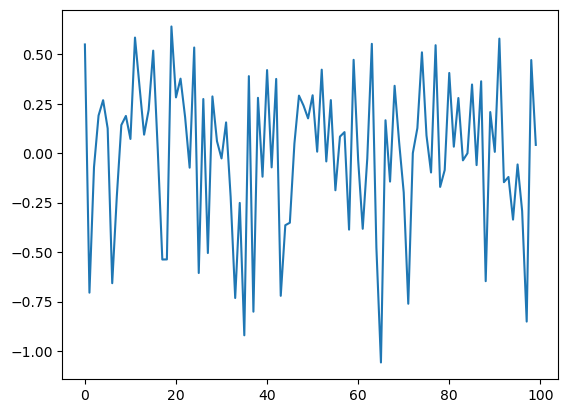

In [87]:
plt.plot(residuals4.index, residuals4)

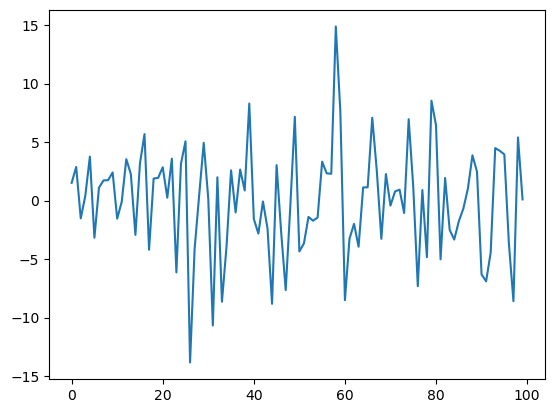

In [88]:
plt.plot(residuals5.index, residuals5)

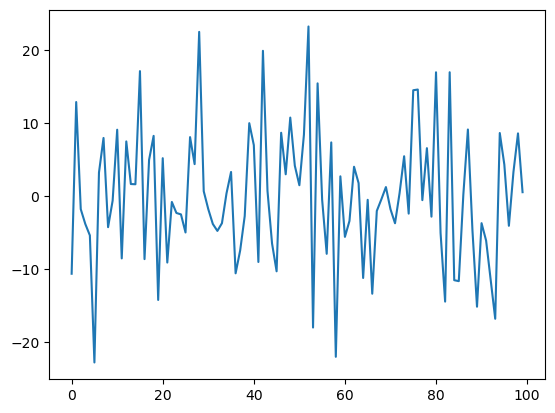

In [89]:
plt.plot(residuals6.index, residuals6)

In [91]:
#Using normal qq plot to evaluate normality of errors.

In [92]:
import pylab as py 

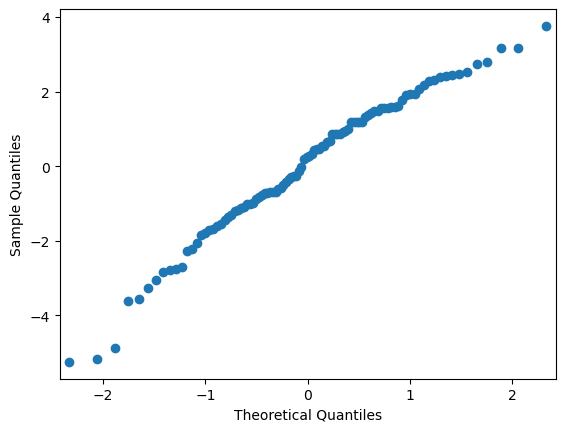

In [95]:
sm.qqplot(residuals1) 
py.show() 

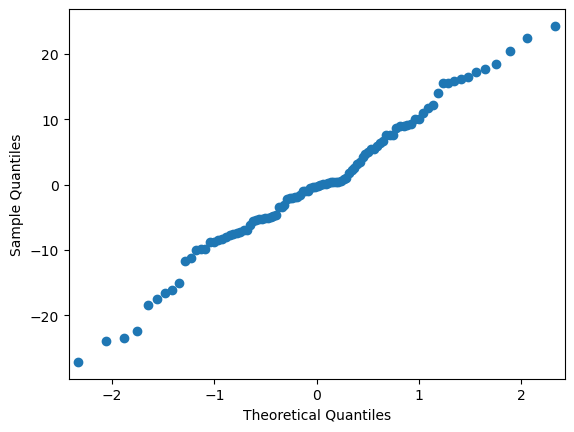

In [94]:
sm.qqplot(residuals2) 
py.show() 

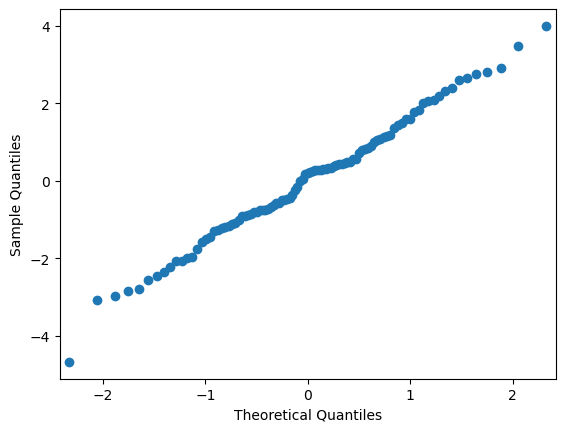

In [96]:
sm.qqplot(residuals3) 
py.show() 

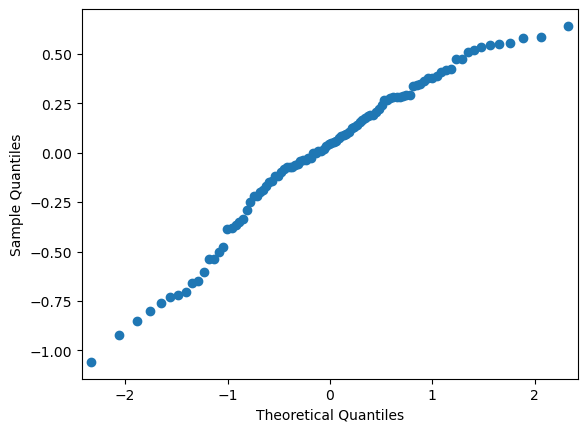

In [97]:
sm.qqplot(residuals4) 
py.show() 

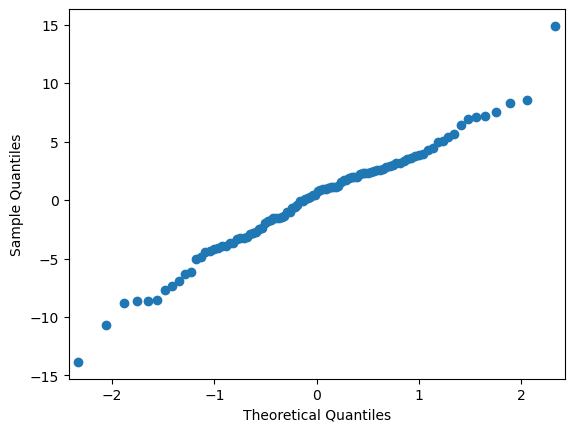

In [98]:
sm.qqplot(residuals5) 
py.show() 

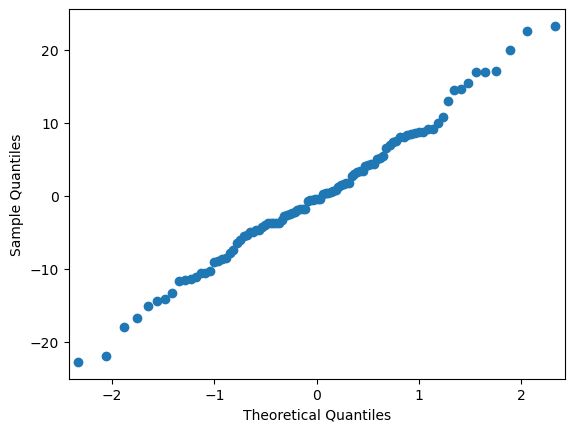

In [99]:
sm.qqplot(residuals6) 
py.show() 

In [100]:
#All models appear normally distributed.